# --- SOLUTION ---

HINT: These solutions only give an impression on how the problems can be tackled. They are neither the best possible solutions nor are they always complete. You are invited to find approaches that outperform those given in the solutions and present them to your fellow students.

# Exercise 1: Data Preprocessing

In this exercise we will mainly focus on data preprocessing. Additionally, we will do some basic classification. If you are unfamiliar with the basics of those topics, take a look at the lectures and exercises of [Data Mining I](https://dws.informatik.uni-mannheim.de/en/teaching/courses-for-master-candidates/ie-500-data-mining/).

For a quick reference of how to work with pandas, you can use [this cheat sheet](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

## Task 1: The Data Set
In the following we will work with the Data Mining Cup Data Set of 2010:
- Download the data set from https://www.data-mining-cup.com/reviews/dmc-2010/
- Make yourself familiar with task and features
- Use the `pandas`-library to import the training data as a DataFrame
- Have an initial look at the data set. Are the features parsed correctly?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('max_columns', 100)  # show all columns


Bad key "text.kerning_factor" on line 4 in
/Users/nheist/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Use the pandas library to import the training data.
# Take a look at the training data to find out which of the import methods of pandas fits best.
# (https://pandas.pydata.org/pandas-docs/stable/reference/io.html)

# --- SOLUTION ---
types = {
    'salutation': np.object,
    'domain': np.object,
    'model': np.object,
    'paymenttype': np.object,
    'invoicepostcode': np.object,
    'delivpostcode': np.object
}
dateparse = lambda x: pd.to_datetime(x, format='%Y-%m-%d') if x.startswith('20') else np.nan  # filter out invalid dates

df = pd.read_csv('dmc2010_train.txt', index_col='customernumber', delimiter=';', dtype=types, date_parser=dateparse, parse_dates=['date', 'datecreated', 'deliverydatepromised', 'deliverydatereal'])

# split features and label
X = df.drop(columns='target90')
y = df['target90']

In [3]:
df.head()

,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,invoicepostcode,delivpostcode,voucher,advertisingdatacode,case,numberitems,gift,entry,points,shippingcosts,deliverydatepromised,deliverydatereal,weight,remi,cancel,used,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
customernumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
41191,2008-12-01,0,0,9,2008-12-01,0,2,2,0,58,NaN,1,NaN,2,2,0,1,0,0,2008-12-03,2008-12-02,737,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
38860,2008-12-16,1,0,4,2008-12-16,0,1,1,1,34,NaN,0,NaN,2,2,0,0,0,0,2008-12-30,2009-02-03,368,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
61917,2008-08-19,0,0,12,2008-08-19,0,1,0,0,51,NaN,0,NaN,1,1,0,0,0,1,2008-09-02,2008-08-28,47,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
40647,2008-06-16,1,0,8,2008-06-16,0,1,0,0,25,NaN,0,NaN,3,2,0,0,0,0,2008-06-17,NaT,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
1347,2008-08-08,0,0,1,2008-08-08,0,1,1,1,41,NaN,0,BR,4,2,0,0,0,0,2008-08-11,2008-08-08,843,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0


In [4]:
df.describe()

,title,newsletter,deliverytype,voucher,case,numberitems,gift,entry,points,shippingcosts,weight,remi,cancel,used,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
count,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.0,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000
mean,0.006969,0.169483,0.201955,0.162020,2.934378,2.019551,0.004564,0.414642,0.0,0.150611,637.920809,0.059979,0.061613,0.068860,0.902122,0.404342,0.276644,0.018903,0.047027,0.180986,0.027908,0.023128,0.000185,0.164981,0.092883,0.186598
std,0.083192,0.375184,0.401465,0.368475,1.319270,1.726046,0.067404,0.492668,0.0,0.357674,724.358131,0.388740,0.306833,0.474444,1.654767,1.410395,1.353981,0.253596,0.434265,0.561751,0.299862,0.401782,0.013601,0.836705,0.610509,0.389594
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.0,0.000000,494.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.000000,1.000000,0.0,0.000000,920.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,5.000000,50.000000,1.000000,1.000000,0.0,1.000000,20076.000000,19.000000,17.000000,19.000000,99.000000,84.000000,90.000000,15.000000,36.000000,14.000000,27.000000,55.000000,1.000000,48.000000,50.000000,1.000000


## Task 2: Data Visualisation
Now, we inspect the data in order to find out what kinds of problems we need to tackle during preprocessing. Most importantly, we want to answer the following questions:
- Which features have a high correlation with each other and are candidates for removal?
- Which features are the most important ones (i.e. correlate best with the label)?
- What other special characteristics can be found for the features of the data set? (keep the last lecture in mind!) 

In [5]:
# Compute the correlation between features (or between a feature and the label) with pandas.
# Here are some hints for a visualisation of the correlations:
# https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas

# --- SOLUTION ---
df.drop(columns='points', inplace=True, errors='ignore')  # remove 'points' as it is always 0
df.corr().style.background_gradient().set_precision(2)

,title,newsletter,deliverytype,voucher,case,numberitems,gift,entry,shippingcosts,weight,remi,cancel,used,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
title,1.00,-0.00,-0.01,0.01,0.03,0.00,-0.00,-0.01,-0.01,0.01,0.01,-0.00,-0.01,0.00,0.01,-0.01,0.00,0.02,-0.01,0.01,-0.00,-0.00,0.01,-0.01,-0.00
newsletter,-0.00,1.00,0.02,0.00,0.03,0.07,-0.00,0.06,-0.04,0.06,0.00,-0.01,0.00,0.02,0.03,-0.00,0.01,-0.00,0.01,-0.00,-0.00,0.02,0.01,0.00,0.08
deliverytype,-0.01,0.02,1.00,-0.22,0.05,-0.01,-0.03,0.32,-0.21,0.02,0.02,0.00,-0.07,0.02,0.01,0.01,-0.04,0.06,-0.16,0.05,0.04,-0.00,0.01,-0.02,0.06
voucher,0.01,0.00,-0.22,1.00,-0.38,-0.01,-0.01,0.09,-0.09,-0.02,-0.03,-0.05,-0.04,-0.03,0.04,-0.07,-0.03,-0.01,0.13,-0.00,-0.00,0.00,-0.03,-0.03,-0.03
case,0.03,0.03,0.05,-0.38,1.00,0.41,0.01,0.04,-0.28,0.41,0.08,0.06,0.02,0.29,0.09,0.19,-0.04,0.07,-0.22,0.05,0.03,0.02,0.09,0.08,0.03
numberitems,0.00,0.07,-0.01,-0.01,0.41,1.00,-0.02,0.08,-0.19,0.77,0.12,0.09,0.18,0.39,0.30,0.25,0.06,0.11,-0.03,0.12,0.04,-0.01,0.18,0.05,0.06
gift,-0.00,-0.00,-0.03,-0.01,0.01,-0.02,1.00,-0.00,0.03,-0.00,0.00,-0.00,-0.01,-0.00,-0.00,-0.01,-0.01,0.00,-0.02,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00
entry,-0.01,0.06,0.32,0.09,0.04,0.08,-0.00,1.00,-0.12,0.14,-0.01,-0.06,-0.12,0.09,0.08,0.02,-0.05,-0.00,-0.22,-0.00,0.00,-0.01,-0.02,-0.01,0.04
shippingcosts,-0.01,-0.04,-0.21,-0.09,-0.28,-0.19,0.03,-0.12,1.00,-0.13,-0.03,0.02,0.08,-0.10,-0.04,-0.05,-0.03,-0.03,-0.14,0.05,0.01,-0.01,-0.02,-0.01,-0.07
weight,0.01,0.06,0.02,-0.02,0.41,0.77,-0.00,0.14,-0.13,1.00,0.11,0.04,0.19,0.37,0.28,0.24,-0.07,0.02,-0.28,0.02,-0.01,-0.01,0.11,0.02,0.04


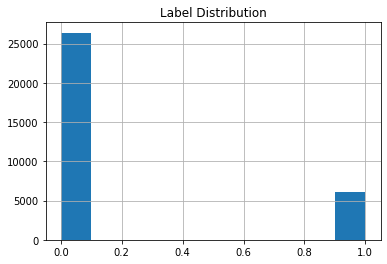

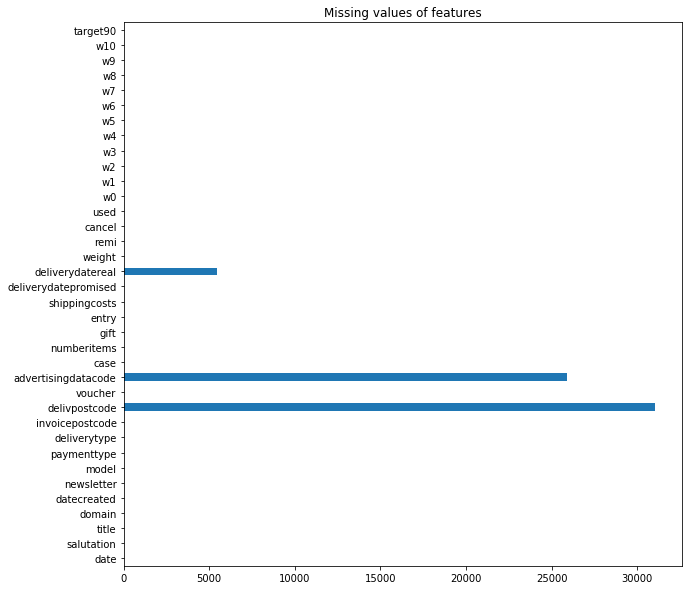

In [6]:
# What else could be important in the data set? Try to think of topics treated in the lecture!
# Check out the preprocessing-documentation of sklearn for additional ideas:
# https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

# --- SOLUTION ---
# analyse distribution of labels
df.hist(column='target90')
plt.title('Label Distribution')
plt.show()

# analyse missing values
from sklearn.impute import MissingIndicator
plt.figure(figsize=(10, 10))
df.apply(lambda x: x.isnull()).sum().plot.barh()
plt.title('Missing values of features')
plt.show()

## Task 3: Classification
Before we do any preprocessing, we first build our classification pipeline. We then use it during the preprocessing to evaluate whether our modifications have an impact on the performance of the classification.
- Complete the `evaluate_classification` function.
  - Use NaiveBayes and DecisionTree as classification algorithms
  - Use 10-fold cross-validation
  - Print accuracy, precision, recall, and F1-measure
- Use `evaluate_classification` to get some baseline results

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold

In [8]:
# Complete the following function which evaluates the performance of the NaiveBayes and DecisionTree classifiers.

def evaluate_classification(X, y):
    # --- SOLUTION ---
    
    # exclude all datetime features and encode categorical attributes to make classification possible
    X_eval = X.select_dtypes(exclude='datetime')
    X_eval = pd.get_dummies(X_eval)

    # evaluate estimators
    for e_name, e in {'Naive Bayes': GaussianNB(), 'Decision Tree': DecisionTreeClassifier()}.items():
        cv = StratifiedKFold(n_splits=10)
        scoring = {'ACC': 'accuracy', 'P': 'precision', 'R': 'recall', 'F1': 'f1'}
        results = cross_validate(e, X_eval, y=y, cv=cv, scoring=scoring)
        metric_results = [np.mean(results[idx]) for idx in ['test_ACC', 'test_P', 'test_R', 'test_F1']]
        print('{}: A={:.2f} P={:.2f} R={:.2f} F1={:.2f}'.format(e_name, *metric_results))

evaluate_classification(X, y)

Naive Bayes: A=0.38 P=0.20 R=0.77 F1=0.32
Decision Tree: A=0.72 P=0.23 R=0.22 F1=0.22


## Task 4: Basic Preprocessing
We start with some initial preprocessing steps. Check, whether the following modifications improve your results:
- Experiment with different feature sets (i.e. only use some features, or discard some irrelevant features)
- Tackle the problem of imbalanced label distributions (you might need an adapted version of `evaluate_classification`)
- Impute missing values using the methods of the lecture (default, min, max, avg, ..)

In [9]:
#### Compute the performance metrics for feature subsets. Pick the features based on insights from the Data Visualisation.

# --- SOLUTION ---
print('Use only features having a correlation > .03 with the label:')
def use_best_correlated_features(df):
    return df[['newsletter', 'deliverytype', 'case', 'numberitems', 'entry', 'shippingcosts', 'weight', 'remi', 'w1', 'w5']]
evaluate_classification(use_best_correlated_features(X), y)

print()
print('Use only features having a correlation > .001 with the label:')
def use_correlated_features(df):
    return df.drop(columns=['title', 'gift', 'w4', 'w6', 'w7', 'w8'])
evaluate_classification(use_correlated_features(X), y)

print()
print('Remove strongly dependent features:')
print('- Feature: WEIGHT -')
evaluate_classification(X.drop(columns=['weight']), y)
print('- Feature: CASE -')
evaluate_classification(X.drop(columns=['case']), y)
print('- Feature: NUMBERITEMS -')
evaluate_classification(X.drop(columns=['numberitems']), y)

Use only features having a correlation > .03 with the label:
Naive Bayes: A=0.78 P=0.28 R=0.12 F1=0.17
Decision Tree: A=0.74 P=0.23 R=0.16 F1=0.19

Use only features having a correlation > .001 with the label:
Naive Bayes: A=0.39 P=0.20 R=0.76 F1=0.32
Decision Tree: A=0.71 P=0.22 R=0.21 F1=0.22

Remove strongly dependent features:
- Feature: WEIGHT -
Naive Bayes: A=0.21 P=0.19 R=0.98 F1=0.32
Decision Tree: A=0.72 P=0.23 R=0.21 F1=0.22
- Feature: CASE -
Naive Bayes: A=0.38 P=0.20 R=0.77 F1=0.32
Decision Tree: A=0.72 P=0.23 R=0.21 F1=0.22
- Feature: NUMBERITEMS -
Naive Bayes: A=0.38 P=0.20 R=0.77 F1=0.32
Decision Tree: A=0.72 P=0.23 R=0.22 F1=0.22


Conclusion: Removing the correlated feature 'weight' helps the Naive Bayes classifier with recall. No significant changes otherwise.

In [10]:
# Create an adapted version of 'evaluate_classification' to tackle the problem of imbalanced label distributions:
# You can either try to balance the training data during cross-validation (which is cumbersome)
# or you check whether the classification algorithms have their own mechanisms of dealing with imbalanced labels

# --- SOLUTION ---
def evaluate_classification_balanced(X, y):
    # exclude all datetime features and encode categorical attributes to make classification possible
    X_eval = X.select_dtypes(exclude='datetime')
    X_eval = pd.get_dummies(X_eval)

    # evaluate estimators
    e = DecisionTreeClassifier(class_weight='balanced')
    cv = cv=StratifiedKFold(n_splits=10)
    scoring = {'ACC': 'accuracy', 'P': 'precision', 'R': 'recall', 'F1': 'f1'}
    results = cross_validate(e, X_eval, y=y, cv=cv, scoring=scoring)
    metric_results = [np.mean(results[idx]) for idx in ['test_ACC', 'test_P', 'test_R', 'test_F1']]
    print('Decision Tree: A={:.2f} P={:.2f} R={:.2f} F1={:.2f} (balanced)'.format(*metric_results))

evaluate_classification_balanced(X, y)

Decision Tree: A=0.69 P=0.23 R=0.28 F1=0.25 (balanced)


Conclusion: Using the `class_weight`-hyperparameter to balance the data set increases the performance of the Decision Tree classifier. For Naive Bayes there is no equivalent hyperparamter (i.e., the training data must be balanced).

In [11]:
# Are there missing values in the data set? Try to impute them using different mechanisms.
# Imputation with pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

# --- SOLUTION ---
# Features with missing values: "deliverydatereal", "advertisingdatacode", "delivpostcode"

print('Imputation with most common value:')
X_mostcommon = X.fillna(X.mode().iloc[0])
evaluate_classification(X_mostcommon, y)
evaluate_classification_balanced(X_mostcommon, y)

print()
print('Imputation using domain knowledge:')
# It is likely that the features are missing because of:
# deliverydatereal: The real delivery date equals the expected delivery date
# advertisingdatacode: The customer did not use any code / voucher
# delivpostcode: The delivery address postcode equals the invoice address postcode
X_domain = X.copy()
X_domain['deliverydatereal'] = X_domain['deliverydatereal'].fillna(X_domain['deliverydatepromised'])
X_domain['advertisingdatacode'] = X_domain['advertisingdatacode'].fillna('---')
X_domain['delivpostcode'] = X_domain['delivpostcode'].fillna(X_domain['invoicepostcode'])
evaluate_classification(X_domain, y)
evaluate_classification_balanced(X_domain, y)

Imputation with most common value:
Naive Bayes: A=0.37 P=0.20 R=0.78 F1=0.32
Decision Tree: A=0.71 P=0.23 R=0.22 F1=0.22
Decision Tree: A=0.69 P=0.23 R=0.28 F1=0.25 (balanced)

Imputation using domain knowledge:
Naive Bayes: A=0.47 P=0.20 R=0.65 F1=0.31
Decision Tree: A=0.72 P=0.23 R=0.22 F1=0.22
Decision Tree: A=0.69 P=0.23 R=0.28 F1=0.25 (balanced)


Conclusion: Simple imputation of missing values does not help.

## Task 5: Feature Generation
Now we generate additional features to improve the classification results. Try to find features that are usefull in this shopping scenario. Check whether the generated features improve the performance of your classification.
- Generate new features from the existing date features (ask yourself which times/days/months you usually shop)
- Apply PCA (Principal Component Analysis) to transform the feature space

In [12]:
# Generate features from existing date features. Try to think of features that define the actual shopping behavior.
# Use pandas to deal with dates: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

# --- SOLUTION ---
import datetime

def add_feature_intimedelivery(df):
    return df.assign(intimedelivery = lambda x: x['deliverydatepromised'] == x['deliverydatereal'])

print('- Feature: in-time delivery -')
evaluate_classification(add_feature_intimedelivery(X), y)
evaluate_classification_balanced(add_feature_intimedelivery(X), y)

def add_feature_daystoorder(df):
    return df.assign(membersince = lambda x: (x['date'] - x['datecreated']).dt.days)

print('- Feature: days to order -')
evaluate_classification(add_feature_daystoorder(X), y)
evaluate_classification_balanced(add_feature_daystoorder(X), y)


def add_feature_orderday(df):
    return df.assign(orderday = lambda x: (x['date']).dt.dayofweek)

print('- Feature: day of order -')
evaluate_classification(add_feature_orderday(X), y)
evaluate_classification_balanced(add_feature_orderday(X), y)


def add_feature_partofmonth(df):
    return df.assign(startmonth = lambda x: (x['date']).dt.day <= 5, endmonth = lambda x: (x['date']).dt.day >= 25)

print('- Feature: start of month / end of month -')
evaluate_classification(add_feature_partofmonth(X), y)
evaluate_classification_balanced(add_feature_partofmonth(X), y)

- Feature: in-time delivery -
Naive Bayes: A=0.38 P=0.20 R=0.77 F1=0.32
Decision Tree: A=0.71 P=0.22 R=0.21 F1=0.22
Decision Tree: A=0.69 P=0.23 R=0.28 F1=0.26 (balanced)
- Feature: days to order -
Naive Bayes: A=0.38 P=0.20 R=0.77 F1=0.32
Decision Tree: A=0.72 P=0.23 R=0.22 F1=0.22
Decision Tree: A=0.69 P=0.23 R=0.28 F1=0.25 (balanced)
- Feature: day of order -
Naive Bayes: A=0.38 P=0.20 R=0.77 F1=0.32
Decision Tree: A=0.71 P=0.22 R=0.21 F1=0.22
Decision Tree: A=0.69 P=0.23 R=0.29 F1=0.26 (balanced)
- Feature: start of month / end of month -
Naive Bayes: A=0.38 P=0.20 R=0.77 F1=0.32
Decision Tree: A=0.72 P=0.23 R=0.22 F1=0.22
Decision Tree: A=0.69 P=0.23 R=0.29 F1=0.26 (balanced)


In [13]:
# Transform the feature space using PCA and check whether the results improve.
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# --- SOLUTION ---
from sklearn.decomposition import PCA
for n_components in range(1, 18, 4):
    pca_features = PCA(n_components=n_components).fit_transform(X.select_dtypes(exclude=['datetime', 'object']))
    X_pca = pd.DataFrame(data=pca_features, index=X.index)
    print(f'- Feature: PCA with {n_components} components -')
    evaluate_classification(X_pca, y)
    evaluate_classification_balanced(X_pca, y)

- Feature: PCA with 1 components -
Naive Bayes: A=0.81 P=0.27 R=0.01 F1=0.03
Decision Tree: A=0.74 P=0.20 R=0.14 F1=0.17
Decision Tree: A=0.64 P=0.21 R=0.33 F1=0.25 (balanced)
- Feature: PCA with 5 components -
Naive Bayes: A=0.80 P=0.23 R=0.04 F1=0.07
Decision Tree: A=0.73 P=0.21 R=0.16 F1=0.18
Decision Tree: A=0.68 P=0.22 R=0.29 F1=0.25 (balanced)
- Feature: PCA with 9 components -
Naive Bayes: A=0.79 P=0.24 R=0.06 F1=0.10
Decision Tree: A=0.73 P=0.22 R=0.17 F1=0.19
Decision Tree: A=0.68 P=0.22 R=0.29 F1=0.25 (balanced)
- Feature: PCA with 13 components -
Naive Bayes: A=0.78 P=0.25 R=0.09 F1=0.13
Decision Tree: A=0.73 P=0.23 R=0.18 F1=0.20
Decision Tree: A=0.68 P=0.23 R=0.29 F1=0.25 (balanced)
- Feature: PCA with 17 components -
Naive Bayes: A=0.78 P=0.28 R=0.12 F1=0.16
Decision Tree: A=0.73 P=0.24 R=0.19 F1=0.21
Decision Tree: A=0.68 P=0.23 R=0.29 F1=0.26 (balanced)


Conclusion: Feature engineering minimally improves the results but neither manually created features nor features generated with PCA are able to provide much additional value here.

## Task 6: Optimisation
Finally, try to optimise your results by tweaking individual parts of the classification process. How much better can the results get?

In [14]:
# OPEN END QUESTION - try to improve your results as much as possible!